# Assignment 1 : SMS Spam Classification
# Rishika Tibrewal, MDS202135

## Importing Libraries

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

## Loading training, validation, test data

In [5]:
train=pd.read_csv("Training Data.csv")
val=pd.read_csv("Validation Data.csv")
test=pd.read_csv("Test Data.csv")

In [6]:
train.head()

,Message,Label
0,send yetty number pls,0
1,1 000 cash 2 000 prize claim call09050000327,1
2,hey babe going ever figure going new year,0
3,let use next week princess,0
4,nice talking please dont forget pix want see,0


In [7]:
val.head()

,Message,Label
0,da happy sit together na,0
1,2nd attempt contract u week top prize either 1...,1
2,text carlos let know hang,0
3,shant disturb u anymore jia,0
4,hello u u 2 u b moving flat co need arrange pi...,0


In [8]:
test.head()

,Message,Label
0,watching tv lor funny bluff 4 wat izzit thk im...,0
1,well done 4 costa del sol holiday 5000 await c...,1
2,sm ac sptv new jersey devil detroit red wing p...,1
3,love working home,0
4,get ready put excellent sub face,0


In [9]:
y_train,X_train=train["Label"],train["Message"]
y_val,X_val=val["Label"],val["Message"]
y_test,X_test=test["Label"],test["Message"]

## Converting string to vectors, to give as input to the models

In [10]:
# replacing NAN entries by empty string
X_train = X_train.replace(np.nan, '', regex=True)
X_val = X_val.replace(np.nan, '', regex=True)
X_test = X_test.replace(np.nan, '', regex=True)

In [11]:
train_emb=model.encode(X_train)
val_emb=model.encode(X_val)
test_emb=model.encode(X_test)

In [12]:
train_emb.shape,val_emb.shape,test_emb.shape

((4025, 384), (711, 384), (836, 384))

## Training Models

# Logistic Regression

In [17]:
lr = LogisticRegression()
lr.fit(train_emb,y_train)
y_pred = lr.predict(train_emb)
print("Accuracy=",accuracy_score(y_train, y_pred)*100,"%")

Accuracy= 98.50931677018635 %


In [30]:
sol=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for j in sol:
    lr = LogisticRegression(solver=j).fit(train_emb, y_train)
    y_pred = lr.predict(val_emb)
    print("Accuracy=",accuracy_score(y_val, y_pred)*100,"%\n", classification_report(y_val, y_pred))

c:\Users\Rishika Tibrewal\OneDrive\Desktop\Applied-Machine-Learning\myenv\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Rishika Tibrewal\OneDrive\Desktop\Applied-Machine-Learning\myenv\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Accuracy= 98.0309423347398 %
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       614
           1       0.96      0.90      0.93        97

    accuracy                           0.98       711
   macro avg       0.97      0.95      0.96       711
weighted avg       0.98      0.98      0.98       711

Accuracy= 98.0309423347398 %
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       614
           1       0.96      0.90      0.93        97

    accuracy                           0.98       711
   macro avg       0.97      0.95      0.96       711
weighted avg       0.98      0.98      0.98       711

Accuracy= 97.8902953586498 %
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       614
           1       0.95      0.90      0.92        97

    accuracy                           0.98       711
   macro avg       0.96      0.94     

solver = 'lbfgs' maximises the recall and accuracy

In [32]:
lr = LogisticRegression(solver='lbfgs').fit(train_emb, y_train)
y_pred = lr.predict(train_emb)
print("Accuracy=",accuracy_score(y_train, y_pred)*100,"%\n", classification_report(y_train, y_pred))

Accuracy= 98.50931677018635 %
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3479
           1       0.99      0.90      0.94       546

    accuracy                           0.99      4025
   macro avg       0.99      0.95      0.97      4025
weighted avg       0.99      0.99      0.98      4025



In [33]:
y_pred = lr.predict(test_emb)
print("Accuracy=",accuracy_score(y_test, y_pred)*100,"%\n", classification_report(y_test, y_pred))

Accuracy= 97.60765550239235 %
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       732
           1       0.97      0.84      0.90       104

    accuracy                           0.98       836
   macro avg       0.97      0.92      0.94       836
weighted avg       0.98      0.98      0.98       836



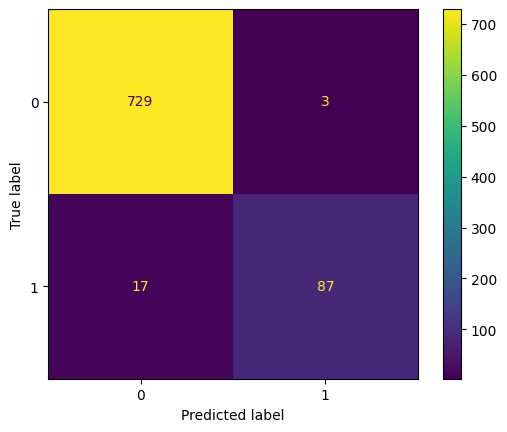

In [42]:
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()

# SVM

In [43]:
clf = SVC(C=1)
clf.fit(train_emb,y_train)
y_pred = clf.predict(train_emb)
print("Accuracy=",accuracy_score(y_train, y_pred)*100,"%")

Accuracy= 99.62732919254658 %


In [44]:
for i in range(1,2000,100):
    clf = SVC(C=i)
    clf.fit(train_emb, y_train)
    y_pred = clf.predict(val_emb)
    print("Accuracy=",accuracy_score(y_val, y_pred)*100,"%\n", classification_report(y_val, y_pred))

Accuracy= 98.59353023909986 %
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       614
           1       0.99      0.91      0.95        97

    accuracy                           0.99       711
   macro avg       0.99      0.95      0.97       711
weighted avg       0.99      0.99      0.99       711

Accuracy= 98.73417721518987 %
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       614
           1       0.97      0.94      0.95        97

    accuracy                           0.99       711
   macro avg       0.98      0.97      0.97       711
weighted avg       0.99      0.99      0.99       711

Accuracy= 98.73417721518987 %
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       614
           1       0.97      0.94      0.95        97

    accuracy                           0.99       711
   macro avg       0.98      0.97  

C=200 maximises recall and accuracy

In [45]:
clf =SVC(C=200).fit(train_emb, y_train)
y_pred = clf.predict(train_emb)
print("Accuracy=",accuracy_score(y_train, y_pred)*100,"%\n", classification_report(y_train, y_pred))

Accuracy= 100.0 %
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3479
           1       1.00      1.00      1.00       546

    accuracy                           1.00      4025
   macro avg       1.00      1.00      1.00      4025
weighted avg       1.00      1.00      1.00      4025



In [46]:
y_pred = clf.predict(test_emb)
print("Accuracy=",accuracy_score(y_test, y_pred)*100,"%\n", classification_report(y_test, y_pred))

Accuracy= 98.80382775119617 %
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       732
           1       0.98      0.92      0.95       104

    accuracy                           0.99       836
   macro avg       0.98      0.96      0.97       836
weighted avg       0.99      0.99      0.99       836



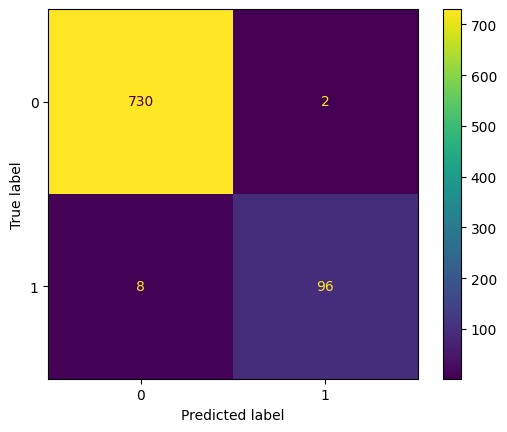

In [47]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

# MLP Classifier

In [48]:
mlp=MLPClassifier()
mlp.fit(train_emb, y_train)
y_pred = mlp.predict(train_emb)
print(accuracy_score(y_train, y_pred)*100, '\n', classification_report(y_train, y_pred))

100.0 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3479
           1       1.00      1.00      1.00       546

    accuracy                           1.00      4025
   macro avg       1.00      1.00      1.00      4025
weighted avg       1.00      1.00      1.00      4025



In [49]:
y_pred = mlp.predict(val_emb)
print("Accuracy=",accuracy_score(y_val, y_pred)*100,"%\n", classification_report(y_val, y_pred))

Accuracy= 98.17158931082982 %
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       614
           1       0.93      0.94      0.93        97

    accuracy                           0.98       711
   macro avg       0.96      0.96      0.96       711
weighted avg       0.98      0.98      0.98       711



In [50]:
y_pred = mlp.predict(test_emb)
print("Accuracy=",accuracy_score(y_test, y_pred)*100,"%\n", classification_report(y_test, y_pred))

Accuracy= 98.80382775119617 %
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       732
           1       0.96      0.94      0.95       104

    accuracy                           0.99       836
   macro avg       0.98      0.97      0.97       836
weighted avg       0.99      0.99      0.99       836



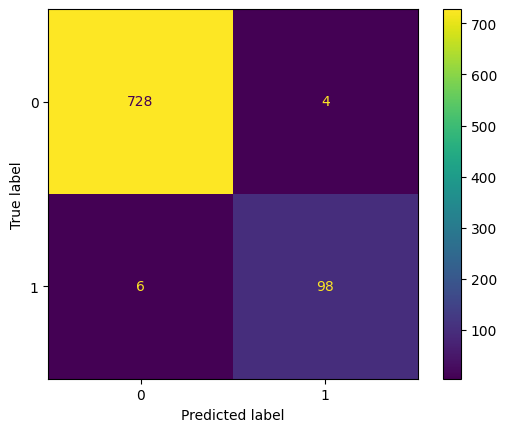

In [52]:
cm = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()

Since our aim is to reduce FN, hence increasing recall, MLP classifier suits best, according to accuracy as well as recall criteria.